# Import plaintext

In [1]:
from tqdm.notebook import trange
NumTraces = 100

In [2]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../joules-swaes-picochip").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        for i in range (NumTraces):
            a = current_file.readline()
            pt.append(a)
        current_file.close()
#pt.sort()

In [3]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))

100
16


# Import key

In [4]:
key_array = []
key = 'f0debc9a78563412efcdab8967452301'
for i in range (NumTraces):
    b = bytes.fromhex(key)
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)
print(len(key_array))
print(len(key_array[0]))

100
16


# Import traces

In [27]:
import glob
import matplotlib.pylab as plt
NumofTraces = NumTraces
strx = []
stry = []
floatx = []
floaty = []
path = "../../joules-swaes-picochip/report_1000samples_1samplesperclk/*.data"  #### edit here
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-20:]):
    #print(filename)
    with open(filename, 'r') as f:
        next(f)
        for a,line in enumerate(f):
            row = line.split()
            if row:
                strx.append(row[-2])
                stry.append(row[-1])
            if a == 78999:  #### edit here, crop the extra points 
                break
                
for i in range (len(stry)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

print(len(trace_array_y))
print(len(trace_array_y[0]))

100
79000


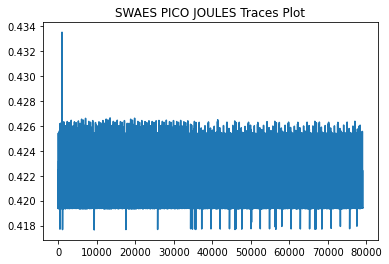

In [47]:
plt.plot(trace_array_y[0])
#plt.plot(trace_array_y[3])
plt.title('SWAES PICO JOULES Traces Plot')
plt.savefig('trace.jpg',dpi=100) # save jpg/png

In [30]:
trace_array_y = np.array(trace_array_y)
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))
print(len(trace_array_y[0]))

100
100
100
79000


# SBox

In [31]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [32]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

knownkey = key_array[0]

key_guess = []
full_cpa_list = []
known_key = [0xf0, 0xde, 0xbc, 0x9a, 0x78, 0x56, 0x34, 0x12, 0xef, 0xcd, 0xab, 0x89, 0x67, 0x45, 0x23, 0x01]

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            hyp[tnum] = HW[intermediate(pt_array[tnum][bnum], kguess)]
            #st1 = pt_array[tnum][bnum] ^ kguess
            #st2 = sbox[st1]
            #hyp[tnum] = st1 ^ st2

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely F0 (actual F0)
 Top 5 guesses: 
   F0 - Diff = 0.928115
   66 - Diff = 0.473031
   22 - Diff = 0.465505
   42 - Diff = 0.463253
   EB - Diff = 0.438731




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely DE (actual DE)
 Top 5 guesses: 
   DE - Diff = 0.969609
   64 - Diff = 0.470461
   2D - Diff = 0.459597
   C8 - Diff = 0.456016
   1A - Diff = 0.445692




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely BC (actual BC)
 Top 5 guesses: 
   BC - Diff = 0.935981
   DA - Diff = 0.461974
   93 - Diff = 0.445535
   FA - Diff = 0.444541
   89 - Diff = 0.441192




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 9A (actual 9A)
 Top 5 guesses: 
   9A - Diff = 0.849630
   6F - Diff = 0.493760
   FF - Diff = 0.467452
   D0 - Diff = 0.451735
   34 - Diff = 0.448578




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 78 (actual 78)
 Top 5 guesses: 
   78 - Diff = 0.965060
   03 - Diff = 0.464967
   74 - Diff = 0.463398
   7E - Diff = 0.442476
   2C - Diff = 0.441179




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 56 (actual 56)
 Top 5 guesses: 
   56 - Diff = 0.979720
   F9 - Diff = 0.453544
   FE - Diff = 0.449687
   7D - Diff = 0.447728
   18 - Diff = 0.437256




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 34 (actual 34)
 Top 5 guesses: 
   34 - Diff = 0.965962
   FB - Diff = 0.498221
   22 - Diff = 0.456873
   2C - Diff = 0.432196
   7A - Diff = 0.430838




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 12 (actual 12)
 Top 5 guesses: 
   12 - Diff = 0.951748
   43 - Diff = 0.498188
   67 - Diff = 0.465061
   9D - Diff = 0.447416
   B8 - Diff = 0.445364




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely EF (actual EF)
 Top 5 guesses: 
   EF - Diff = 0.952486
   84 - Diff = 0.483700
   A7 - Diff = 0.478299
   1C - Diff = 0.456881
   4F - Diff = 0.444200




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely CD (actual CD)
 Top 5 guesses: 
   CD - Diff = 0.819870
   B6 - Diff = 0.477918
   7A - Diff = 0.468669
   D4 - Diff = 0.467436
   B8 - Diff = 0.443258




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AB (actual AB)
 Top 5 guesses: 
   AB - Diff = 0.968002
   98 - Diff = 0.485582
   9D - Diff = 0.476255
   FF - Diff = 0.475594
   58 - Diff = 0.469624




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely 89 (actual 89)
 Top 5 guesses: 
   89 - Diff = 0.890917
   F2 - Diff = 0.462941
   B5 - Diff = 0.445545
   BD - Diff = 0.443460
   E5 - Diff = 0.438531




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely 67 (actual 67)
 Top 5 guesses: 
   67 - Diff = 0.962678
   17 - Diff = 0.438557
   94 - Diff = 0.437056
   3E - Diff = 0.420080
   59 - Diff = 0.413277




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely 45 (actual 45)
 Top 5 guesses: 
   45 - Diff = 0.961297
   BD - Diff = 0.443960
   4C - Diff = 0.427276
   E2 - Diff = 0.426511
   2F - Diff = 0.425994




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely 23 (actual 23)
 Top 5 guesses: 
   23 - Diff = 0.985426
   94 - Diff = 0.490949
   BE - Diff = 0.479462
   02 - Diff = 0.456792
   B4 - Diff = 0.450803




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 01 (actual 01)
 Top 5 guesses: 
   01 - Diff = 0.969358
   5B - Diff = 0.488601
   DC - Diff = 0.462666
   3A - Diff = 0.458038
   68 - Diff = 0.454381




# How Many Traces Needed for Method 1

In [33]:
traces_enc_full = trace_array_y

In [34]:
len(traces_enc_full[0])

79000

In [35]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [37]:
x = np.arange(5, 105, 5)
x

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])

In [38]:
full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

traces_enc = []
pt = []
known_key = key_array[0]

for traces in trange(5, 105, 5): ## edit here
    x = np.arange(5, 105, 5)  ###########3 edit the x here !!!!!
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(pt_array[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    cpa_list = []
    for bnum in range(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]

            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        sorted_args = np.argsort(maxcpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-38-4b2334feba93>:50: RuntimeWarning: invalid value encountered in true_divide
  cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)


For  5 traces, correct key byte are  0


For 10 traces, correct key byte are  3


For 15 traces, correct key byte are 12


For 20 traces, correct key byte are 16


For 25 traces, correct key byte are 16


For 30 traces, correct key byte are 16


For 35 traces, correct key byte are 16


For 40 traces, correct key byte are 16


For 45 traces, correct key byte are 16


For 50 traces, correct key byte are 16


For 55 traces, correct key byte are 16


For 60 traces, correct key byte are 16


For 65 traces, correct key byte are 16


For 70 traces, correct key byte are 16


For 75 traces, correct key byte are 16


For 80 traces, correct key byte are 16


For 85 traces, correct key byte are 16


For 90 traces, correct key byte are 16


For 95 traces, correct key byte are 16


For 100 traces, correct key byte are 16




# CPA Number of traces vs. correctly guessed key bytes

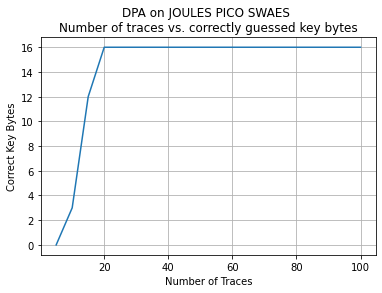

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# need to make adjustment here for600sample-Copy1 further experienments
# here x is 45 because we run 45 intervals of traces from 5 to 230 with incresing step of 5
### edit below
#x = np.arange(2,45,2) 
### edit above

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
############################################## edit here
plt.title('DPA on JOULES PICO SWAES \nNumber of traces vs. correctly guessed key bytes')
plt.savefig('traces.jpg',dpi=100) # save jpg/png

# Plot for the correlation vs traces 

In [40]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = full_cpa_list[i][subkey][guess] 
                ### edit above -- the list name need to be change for the especific name 
                ymax = corr.max()
                max_correct.append(ymax)
            else:
                corr = full_cpa_list[i][subkey][guess]
                ymax = corr.max()
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

20
16
1
20
16
255


In [41]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [133]:
peak_corr = []
last = len(x)-1
for i in range (16):
    peak_corr.append(corr_plot_full[i][last][0])
print(peak_corr)
#np.array(peak_corr).Stofile("100_peak_corr.bin")

[0.10627544035117649, 0.08635160427093272, 0.7962831348622197, 0.3409307351767631, 0.8210427178371767, 0.7630133951583115, 0.09523155838455996, 0.12334561584033191, 0.6333888013763341, 0.8067812270977377, 0.7198598214434337, 0.7629010188511667, 0.11643535203838927, 0.1318044116259465, 0.8150628223429894, 0.7120789872881065]


In [42]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

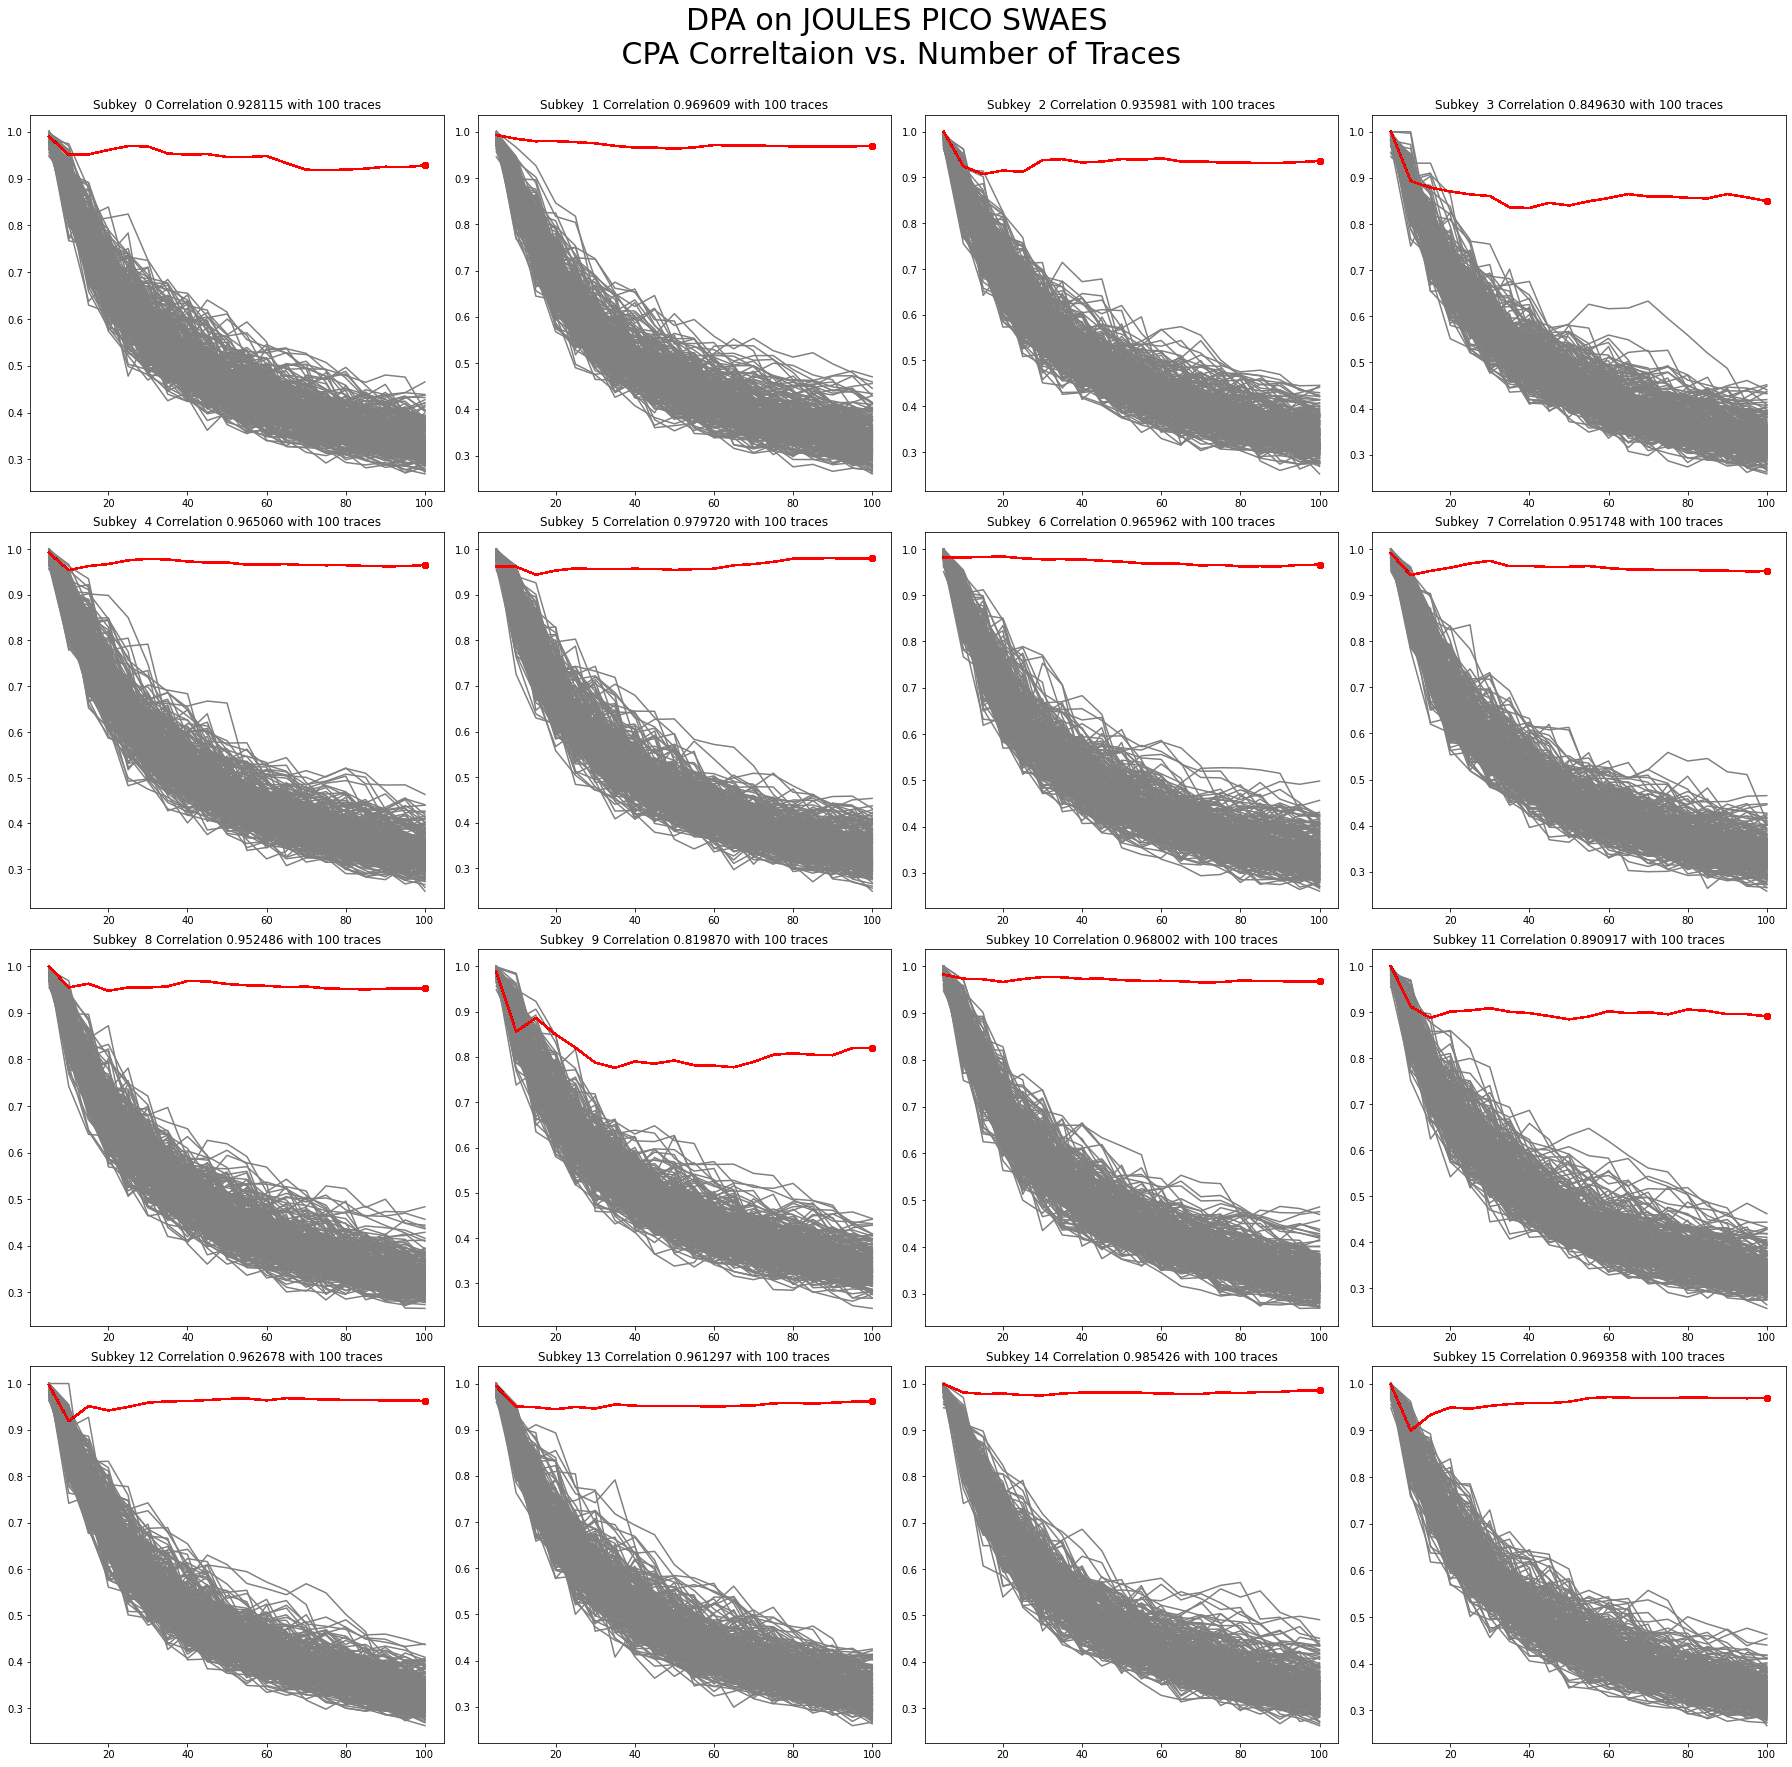

In [48]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        ### edit below, different experienment needs different xaxis
        #x = np.arange(5, 230, 5)  
        ### edit above
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        
        last = len(x)-1
        val = corr_plot_full[subkey][last][0]
        plt.plot(x[last],val,marker='.', markersize=10, color="red",zorder=255)
        
        plt.title('Subkey %2d Correlation %2f with %2d traces' %(subkey,val,x[last]))
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('DPA on JOULES PICO SWAES\n CPA Correltaion vs. Number of Traces', size=30)

plt.savefig('traces.jpg',dpi=300)  
            
plt.show()

In [ ]:
import pylab

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))

value = 1

for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[3][subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[3][subkey][guess]),color="grey")
            
    value += 1
    
    corr = abs(full_cpa_list[3][subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=20, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('DPA on JOULES PICO SWAES with 20 traces\n CPA Correltaion vs. Samples', size=30)

plt.savefig('1.jpg',dpi=100)  
    
plt.show()

<Figure size 432x288 with 0 Axes>

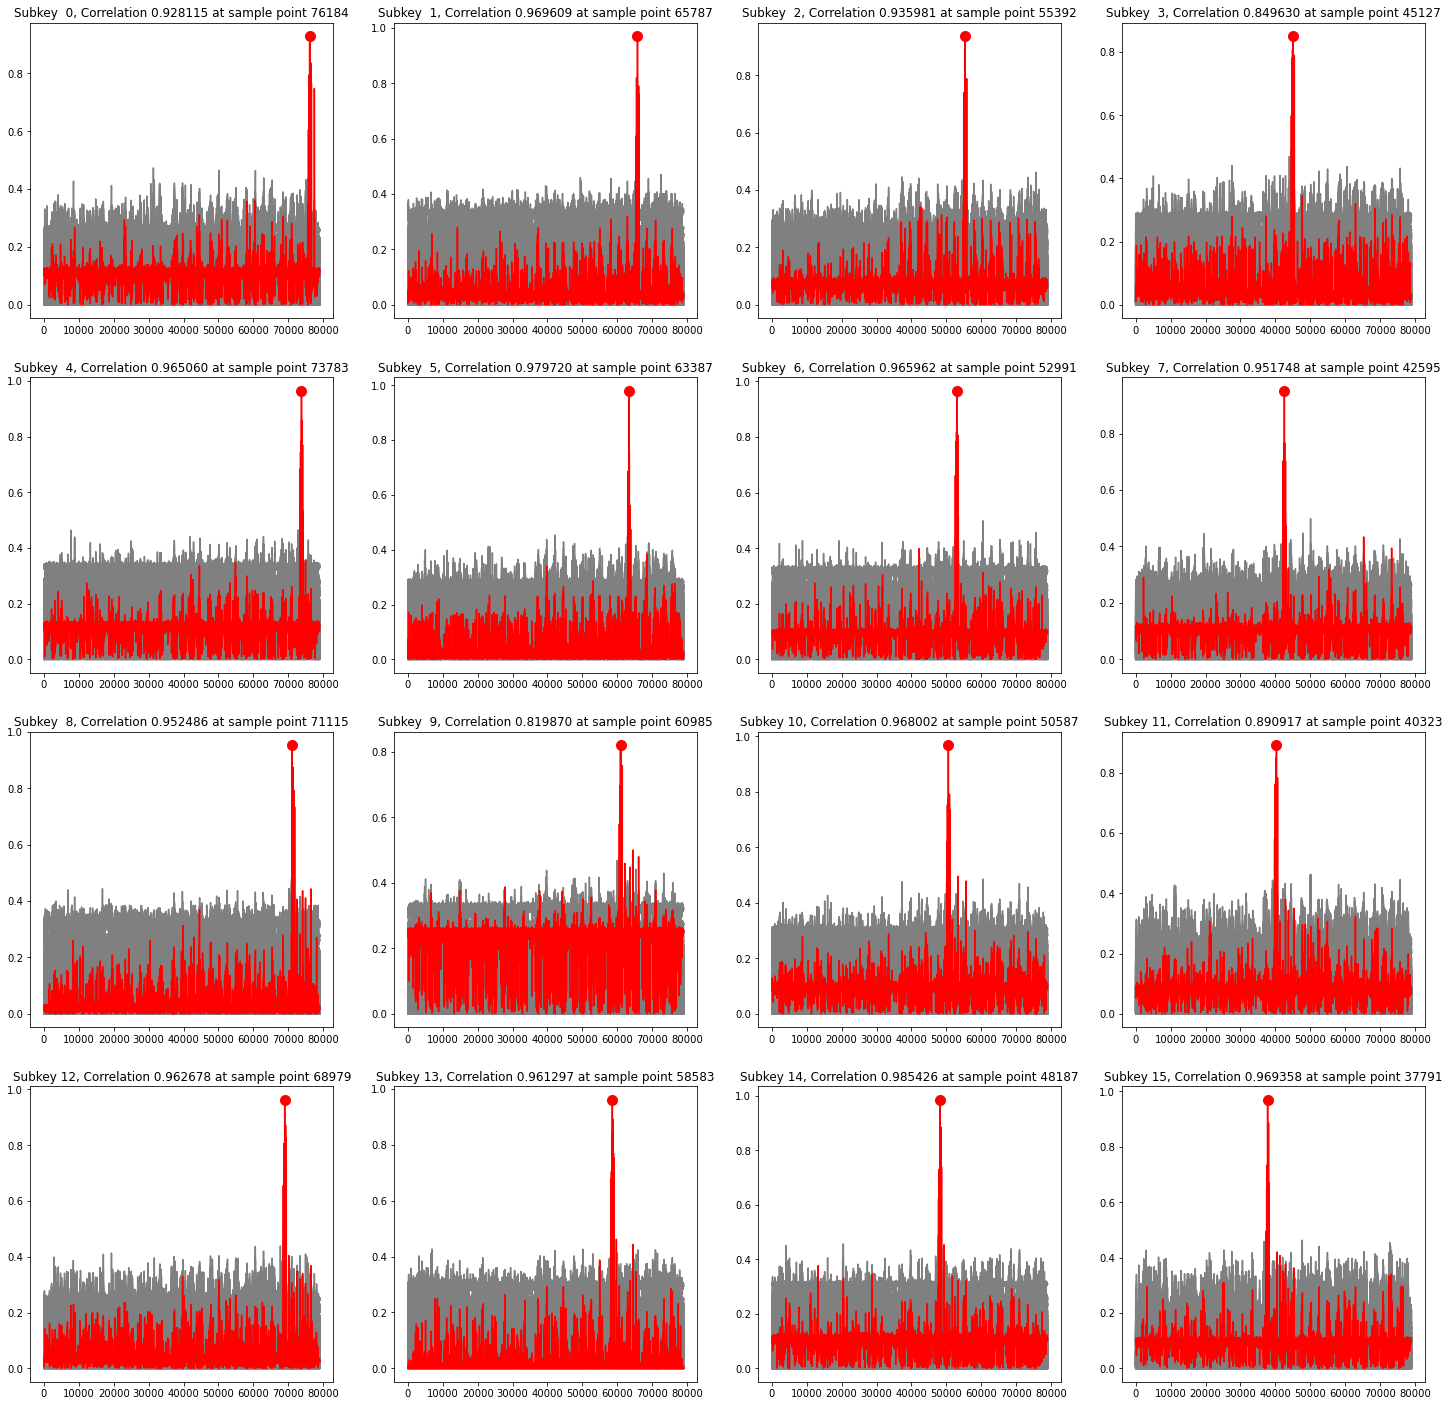

In [49]:
import pylab

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))

value = 1

for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[19][subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[19][subkey][guess]),color="grey")
            
    value += 1
    
    corr = abs(full_cpa_list[19][subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=20, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('DPA on JOULES PICO SWAES with 100 traces\n CPA Correltaion vs. Number of Traces', size=30)

plt.savefig('2.jpg',dpi=300)  
    
plt.show()

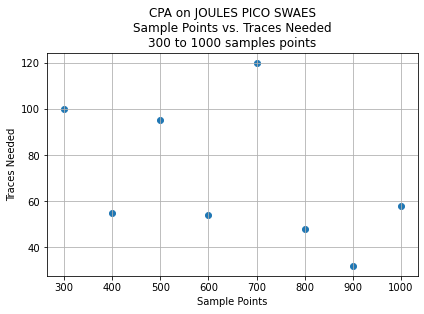

In [44]:
x_axis_sample_points = [300,400,500,600,700,800,900,1000]
y_how_many_traces_needed_to_attack = [100,55,95,54,120,48,32,58]
plt.scatter(x_axis_sample_points, y_how_many_traces_needed_to_attack)
plt.grid()
plt.xlabel('Sample Points')
plt.ylabel('Traces Needed')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
############################################## edit here
plt.title('CPA on JOULES PICO SWAES\nSample Points vs. Traces Needed\n300 to 1000 samples points')
plt.savefig('Sample Points vs. Traces Needed.jpg',dpi=100) # save jpg/png